# EAT ME or DON'T EAT ME
### A classification of edible mushrooms based on physical characteristics
### By: Neil Lukowski
### Date: 11/6/2020
***

## Table of Contents
* [A Hypothetical Forager](#A-Hypothetical-Forager)
* [The Digital Wanderer's Toolset](#The-Digital-Wanderer's-Toolset)
* [The Forager's Guidebook](#The-Forager's-Guidebook)
* [The Encoder Ring](#The-Encoder-Ring)
* [The Digital Multi-tool](#The-Digital-Multi-tool)
* [The Best of the Best](#The-Best-of-the-Best)
* [The Image of Hope](#The-Image-of-Hope)
* [A Set of Best Pairs](#A-Set-of-Best-Pairs)
* [Conclusion](#Conclusion)
* [Reflection](#Reflection)
* [3 Good Questions](#3-Good-Questions)
* [Acknowledgments](#Acknowledgments)
* [Citations](#Citations)

***

### A Hypothetical Forager

Wondering through the woods, one might happen upon a small capped fungus clinging to the rotting stump of an old tree. Depending upon the present level of hunger one is experiencing, one might have a strong desire to consume said fungus. Doing so without prior knowledge of mushroom classifications, the choice to devour the seemingly innocuous fungi could prove fatal. Is it possible to classify mushrooms as poisonous or not poisonous based solely upon the its physical characteristics? If it were to prove possible, it may be possible to create a phone application or infograph that could potentially save lives for the hypothetical forest forager.

Using a dataset of mushroom features let's see if it is possible using predictive algorithms to see if a mushroom is on the menu.
***

### The Digital Wanderer's Toolset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### The Forager's Guidebook

The journey through the forest has come upon the first hint of food in the form of a small mushroom. The wanderer digs into his backpack for his digital multi-tool and his copy of The Forager's Guidebook. He quickly finds the section on mycology and looks for the entry that matches the specimen before him.

In [405]:
mushroom_df = pd.read_csv("mushrooms.csv") # reading the entries on mushrooms

Are there any smudges? Are there any missing pages?

In [406]:
mushroom_df.info() # checking for missing entries or odd datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Well...the pages are all there and they appear to be clean...but they seem to be written in a strange shorthand script. If for our wanderer's digital multi-tool is  to perform any analysis the script must be converted into numeric form.

### The Encoder Ring
Now is the time for the trusty encoder ring! The trusty tool of many intrepid categorical explorers, the encoder ring takes the characters of the shorthand and converts them into binary 0's and 1's. Feeding this computer-friendly form of information into the digital multi-tool will get our hungry protagonist one step closer to a safe meal.

In [407]:
from sklearn.preprocessing import OneHotEncoder
enc_ring = OneHotEncoder(drop = "if_binary")

In [408]:
# Dr. Andrew Penland graciously provided the code below and may have saved our poor hungry wanderer's life.

mushroom_df["edible"] = mushroom_df["class"].map({"p":0, "e":1}) # the variable "class" held the key, and we will rename it something more useful as it is encoded.
mushroom_df = mushroom_df.drop(columns = ['class'])

In [409]:
mushroom_df_target = mushroom_df["edible"] # isolating the target information
mushroom_df_features = mushroom_df.drop(columns = ["edible"]) # isolating the features

Now that the desired information has been found, the encoder ring does its work.

In [410]:
# Narrator's thoughts: I wanted to see if Dr. Penland's tutorial suggestion to treat two of the features as ordinals would help...but after much struggles with
# sklearn's OrdinalEncoder I've left that for another day. The record of that rabbit trail is commented out below and in another commented section later.

# mushroom_df_ords = mushroom_df_features.loc[:, ['population','ring-number']]  
# mushroom_df_features = mushroom_df_features.drop(columns = ['population', 'ring-number'])

In [411]:
mushroom_df_feat = enc_ring.fit_transform(mushroom_df_features) #OHE encoding the features into new df
mushroom_df_names = enc_ring.get_feature_names(mushroom_df_features.columns) # using the columns of the original features df to make names of new encoded features

In [412]:
# The process to OHE this data as described above and below were provided by the aformentioned tutorial.

mushroom_enc_df = pd.DataFrame(data = mushroom_df_feat.toarray(),
                               columns = mushroom_df_names)

In [413]:
# After much effort trying to force the order of the ordinal...the meanderings of the wanderer are left here as a cautionary tale.

#from sklearn.preprocessing import OrdinalEncoder

# following example found on https://stackoverflow.com/questions/50092911/how-to-map-categorical-data-to-category-encoders-ordinalencoder-in-python-pandas
#ord_cols_map = [{"col":"population", "mapping": [('a',5), ('c',4), ('n',3), ('s',2), ('v',1), ('y', 0)]},
#               {"col":"ring-number", "mapping": [{'n': 0, 'o': 1, 't': 2}]}]

#ord_ring = OrdinalEncoder(mapping = ord_cols_map, 
#                         return_df = True)

#ord_enc_features = ord_ring.fit_transform(mushroom_df_ords)
#ord_enc_names = mushroom_df_ords.columns

#mushroom_ordenc_df = pd.DataFrame(data = ord_enc_features,
#                                  columns = mushroom_df_ords.columns)

#ord_ring.get_feature_names()

### The Digital Multi-tool

BEEP...BEEP...BOOP...BEEP...the data has been encoded and input into the traveler's device. What will the calculations say about the mushrooms before him? Will the results be close enough to comfortably risk death? Let's see how it handles the test.

In [414]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

In [415]:
clas_vals = mutual_info_classif(mushroom_enc_df,mushroom_df_target)

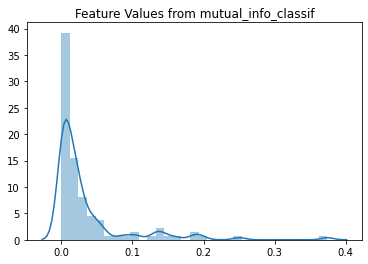

In [416]:
plt.title("Feature Values from mutual_info_classif")
ax = sns.distplot(clas_vals)

It appears that out of 112 binary classifications...the bulk are 0 or close to 0. This would seem to indicate that many features are of little usefulness. All hope is not lost though. The multi-tool has limited processing power and may be able to make a sound prediction using only the most important features. While there is an automatic way to select these, the wanderer has decided to do it manually to keep his wits sharp and keep his mind off the hunger pains.

In [417]:
informative = [] # Creating empty array to fill with tuples of feature names and relative classif scores
for i in range(clas_vals.size):
    a = mushroom_enc_df.columns[i]  # getting encoded column names from mushroom_enc_df
    b = clas_vals[i]                # getting value of classif score
    c = (a,b)                       # creating tuple in form of (col name, classif score)
    informative.append(c)           # appending tuple to the informative array

### The Best of the Best

After going through the classifications one by one, the explorer has matched all the scores with their respective encoded feature names. Because he has limited processing power available to him, he wants to select only the best features for his analysis. Seeing the graph above, there were a handful of features that had scores above the 0.1 range and these might make good predictors of mushroom edibility.


In [418]:
# Reminder of how to index tuples found here https://www.tutorialspoint.com/python/python_tuples.htm

THRESHOLD = 0.1                    # This constant can be edited to provide various levels of selectivitiy
very_inform = []                   # Creating empty array to hold isolated features
for i in informative:
    temp = i
    if temp[1] > THRESHOLD:        # Checking if the selected threshold condition has been met
        very_inform.append(temp)   # Appending the 

print("\nBased on the selected threshold, " + str(THRESHOLD) + ", there are " + str(len(very_inform)) + " exceptionally informative features which are listed below.\n")
very_inform                        


Based on the selected threshold, 0.1, there are 13 exceptionally informative features which are listed below.



[('bruises_t', 0.13710535883999775),
 ('odor_f', 0.2504275860943084),
 ('odor_n', 0.3741700036434732),
 ('gill-size_n', 0.16204448890522904),
 ('gill-color_b', 0.1888962484283736),
 ('stalk-surface-above-ring_k', 0.1983596696144314),
 ('stalk-surface-above-ring_s', 0.13037296039862634),
 ('stalk-surface-below-ring_k', 0.18679126058602935),
 ('ring-type_l', 0.13320365178475813),
 ('ring-type_p', 0.148978729094442),
 ('spore-print-color_h', 0.1408753063880812),
 ('spore-print-color_n', 0.10307375975537791),
 ('population_v', 0.1068645938703432)]

In [419]:
# Converting the array of tuples into a dataframe as it seems like it may prove useful. The instructions to do so found at the link below.
# https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/

inform_df = pd.DataFrame(very_inform, columns =['Feature', 'Score']) 

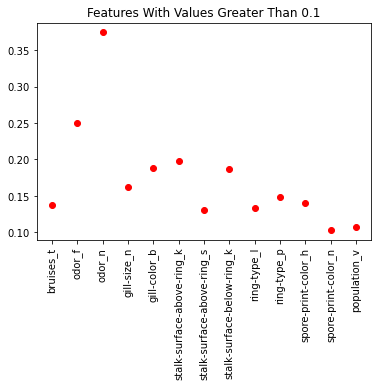

In [420]:
# https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples-in-python

x_val = [x[0] for x in very_inform]
y_val = [x[1] for x in very_inform]

#plt.scatterplot(x_val,y_val)
plt.plot(x_val, y_val,'or')

# https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(rotation=90)
plt.title("Features With Values Greater Than " + str(THRESHOLD))

plt.show()

Plotting the values of the selected features shows that odor (or absence of odor) may be one of the strongest indications of a mushroom's edibility. Does the wisdom of Gandalf in the Mines of Moria hold when he says..."If in doubt...always follow your nose."?

In [421]:
exp_df = pd.DataFrame() # Creating a new df instance called exp_df to do some experiments on. 

# These Python attempts are left only becasue they took so many attempts to finally get the desired effect of using the selected columns and isolating them in
# the encoded df. So much effort is difficult to simply...delete.

#feats = '\''
#for i in range(len(very_inform)):
#    x = very_inform[i]
#    y = x[0]
#    feats = feats + '\'' + str(y) + '\', '
    #exp_df = exp_df.join(mushroom_enc_df[y])
#    print(feats)
#.drop(columns != [x[0] for x in very_inform])

# The solution was much simpler than the above effort, mostly thanks to help from 
# https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

exp_df = mushroom_enc_df[inform_df['Feature']].copy()   # exp_df is intended to be a slice of the original mushroom_enc_df using only the inform_df features.
sel_feats_df = exp_df                                    # making a copy of the exp_df for potential future use since it is only features and does not include target
exp_df['edible'] = mushroom_df_target                   # creating a new column in exp_df and giving it all rows of mushroom_df_target that target edibility

exp_df.head()                                           # checking to see if desired results have been achieved

,bruises_t,odor_f,odor_n,gill-size_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_n,population_v,edible
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


Victory! The best features hand selected and the target all on the same page! There may be something interesting that can be gained from this information.

### The Image of Hope

The notes in the margin have all been tabulated and the manual combing of the encoded guidebook data is complete. As hunger delirium threatens to set in, there is an odd, old familiar button on the multi-tool called "Heatmap". Knowing full well this isn't the actual function he's looking for, his curiosity is piqued none-the-less. What would his hand-selected digitized data look like graphically displayed?

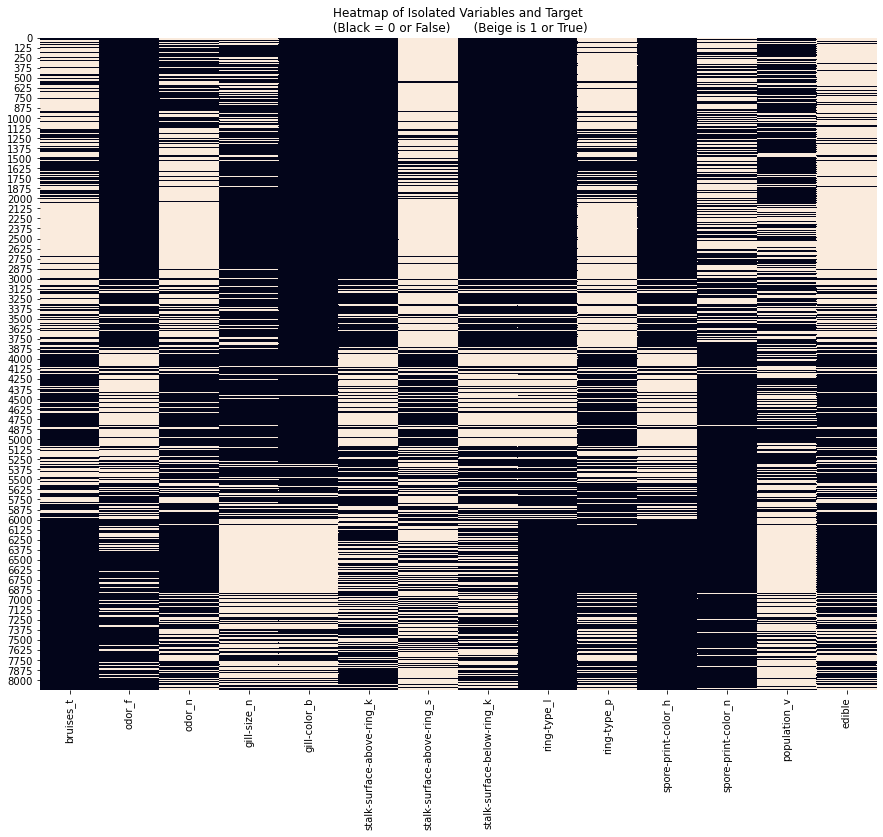

In [422]:
plt.subplots(figsize=(15, 12))
plt.title('Heatmap of Isolated Variables and Target\n (Black = 0 or False)      (Beige is 1 or True)')
bx = sns.heatmap(exp_df, cbar=False)

Attempting to use the heatmap on the One Hot Encoded data did not seem like a good idea at first, but after testing it...it provided some immediately interesting insights. The first thing that became clearly noticeable was the block of beige created at the intersection of gill_size_n/gill_color_b and the range 6000-7000. This block coincides with a clear black block in the target "edible" band. Looking across that entire range of 6000-7000 there seems to be clear bands in several features. A similar pattern appears between 2000 and 2875. Perhaps there is reason to be hopeful that edibility will be easy to predict.

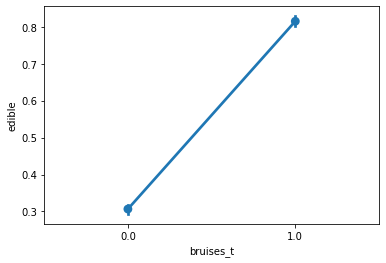

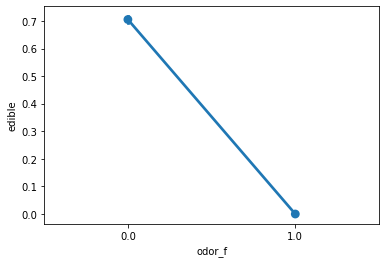

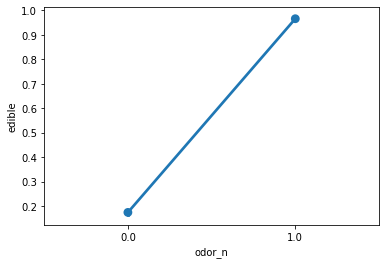

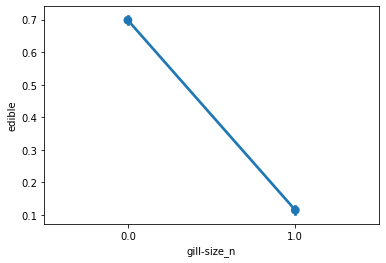

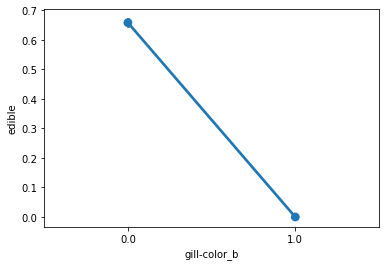

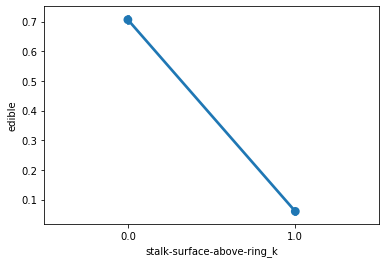

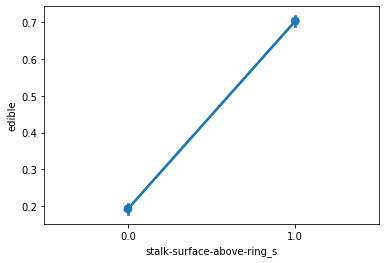

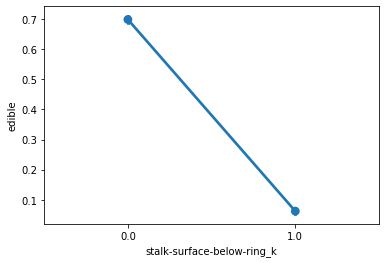

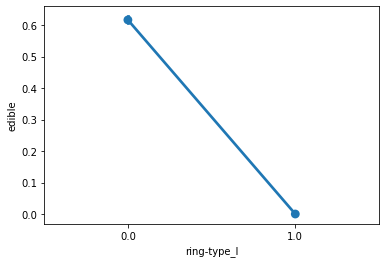

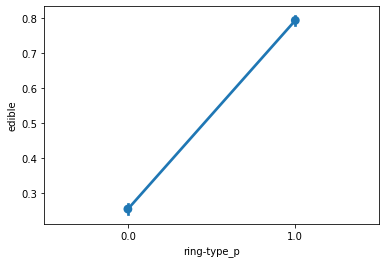

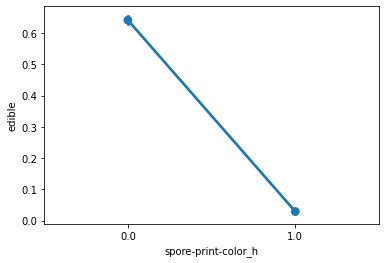

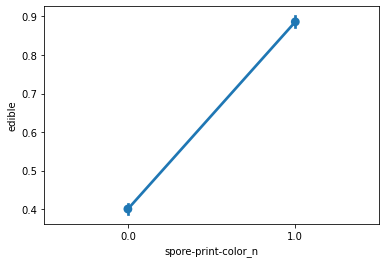

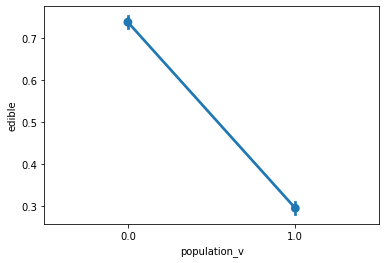

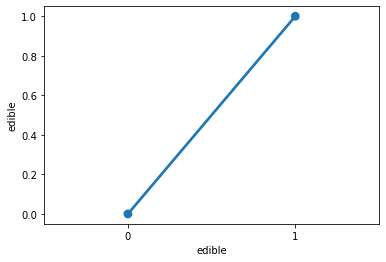

<Figure size 432x288 with 0 Axes>

In [423]:
# The idea for the plots below came from https://www.textbook.ds100.org/ch/14/feature_one_hot.html

for i in exp_df:
    x = sns.pointplot(x=exp_df[i], y='edible', data=exp_df);
    plt.figure()     # solving the stacking issue sol here https://stackoverflow.com/questions/36018681/stop-seaborn-plotting-multiple-figures-on-top-of-one-another

Plotting each feature versus the target in this fashion shows clear positive and negative relationships. Some of those relationships are stronger than others as is the case in ring_type_p and odor_n which both approach 1.0 on edible. Perhaps mushrooms with pendant type rings without odor are the best bet? More testing needs to be done to be sure. But first, what about combining some of these features into new combinations?

### A Set of Best Pairs

Based on the images above, it was apparent that some of the features were very close to absolute 1.0 or 0.0 positively or negatively. For example, it was pretty clear that if the mushroom has a foul odor...don't eat it. In other cases, if the mushroom bruises it may be safe to eat since a 1 in the bruise_t corresponded to just over 0.8 on edible. So combining two very strong positive features...and combining two strong negative features...might create two very strong indicators. For edible = 0 perhaps foul odor and black gill color would be good candidates. And for edible = 1 perhaps no odor and the fact that it bruises.

In [424]:
# Reminder to merge columns found at
#  https://www.kite.com/python/answers/how-to-combine-two-columns-in-a-pandas-%60dataframe%60-in-python#:~:text=Use%20
#  concatenation%20to%20combine%20two,two%20DataFrame%20columns%20into%20one.

# I'm sure there is a better way to do this, but I couldn't find it fast enough.

exp_df["bodor_bgill"] = (exp_df["odor_f"] + exp_df["gill-color_b"]).replace([1.0, 2.0], [0, 1.0]) # keeping only values shared as 1.0's

# Reminder how to find what values were stored in a particular column
#       https://dfrieds.com/data-analysis/value-counts-python-pandas.html#:~:text=value_counts()%20Method%3A%20Count%20Unique%20Occurrences%20of%20Values%20in%20a%20Column,
    #   -November%2025%2C%202018&text=In%20pandas%2C%20for%20a%20column,the%20unique%20occurences%20of%20values.
    
exp_df["bodor_bgill"].value_counts()   # was how I checked that there were no 2.0's or 3.0's after processing

0.0    7548
1.0     576
Name: bodor_bgill, dtype: int64

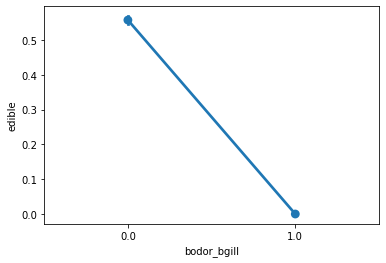

In [446]:
x = sns.pointplot(x=exp_df["bodor_bgill"], y='edible', data=exp_df);

The negative slope of this is shallower than that of either variable independently. Perhaps that would make it less likely to grant a false positive of edibility. The DO NOT EAT is also much stronger with this variable.

In [445]:
exp_df["nodor_bruises"] = (exp_df["odor_n"] + exp_df["bruises_t"]).replace([1.0, 2.0], [0, 1.0]) # same process of merge and replace

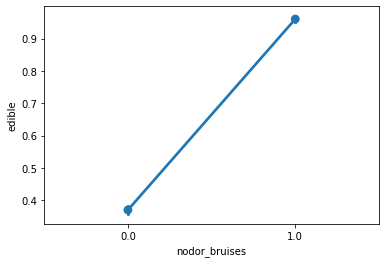

In [449]:
x = sns.pointplot(x=exp_df["nodor_bruises"], y='edible', data=exp_df);

In this case, it seems that there is strong case for edibility if a mushroom has no odor and it bruises, but any uncertainty between would increase the chance that it is not edible. Time to do some testing.

### The Testing

First, what happens if the entire guidebook worth of information is simply fed into the digital multi-tool? The process below shows what happens when all 112 One Hot Encoded features are used for training and testing.

In [427]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [428]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_enc_df, mushroom_df_target, test_size = 0.3) # using mushroom_enc_df for features

In [459]:
DTC = DecisionTreeClassifier(max_depth = 3)  #creating classifier object with max_depth of 3 based on example by Dr. Penland.

In [460]:
DTC.fit(X_train, y_train);  # fitting the training data to the DecisionTreeClassifier model object

In [461]:
print("The DecisionTreeClassifier score on the training data using all 112 features is...")
DTC.score(X_train, y_train)

The DecisionTreeClassifier score on the training data using all 112 features is...


0.984699261343651

In [462]:
print("The DecisionTreeClassifier score on the testing data using all 112 features is...")
DTC.score(X_test, y_test)

The DecisionTreeClassifier score on the testing data using all 112 features is...


0.9864643150123051

Utilizing all 112 features, the DecisionTreeClassifier does pretty well making a prediction with a max_depth of 3. Increasing the depth would improve the score at the cost of over-fitting. Looking at the results, is is possible that there are features in the 112 that are completely irrelevant and are causing the model to be slightly incorrect? One way to find out is to run the test again but this time use the carefully hand-selected features instead of all 112.

In [433]:
X_train, X_test, y_train, y_test = train_test_split(sel_feats_df, mushroom_df_target, test_size = 0.3)

In [434]:
DTC.fit(X_train, y_train);  # refitting the training data to the DecisionTreeClassifier model object since the features have changed

In [435]:
print("The Decision Tree Classifier score on the training data using only the best features is...")
DTC.score(X_train, y_train)

The Decision Tree Classifier score on the training data using only the best features is...


1.0

In [436]:
print("The Decision Tree Classifier score on the testing data using only the best features is...")
DTC.score(X_test, y_test)

The Decision Tree Classifier score on the testing data using only the best features is...


1.0

In this case, it appears that by selecting only the top scoring features it is possible to categorize mushrooms as edible or not. Not wanting to risk death or extreme gastrointestinal distress, our intrepid explorer continues testing with another model.

In [437]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)

In [438]:
gbc.fit(X_train, y_train)  # model is fit to the testing set that was determined by the best features

print("The GradientBoostingClassifier score on the training data using only the best features is...")
gbc.score(X_train, y_train)

The GradientBoostingClassifier score on the training data using only the best features is...


1.0

In [439]:
print("The GradientBoostingClassifier score on the testing data using only the best features is...")
gbc.score(X_test, y_test)

The GradientBoostingClassifier score on the testing data using only the best features is...


1.0

Testing this model on the 112 feature set also returned scores of 1.0, but that is not conclusive enough to risk life just yet. Perhaps GridSearchCV can find some useful insight about the modeling process. At what point does the DecisionTreeClassifier reach 1.0 on the original encoded mushroom_enc_df when increasing max_depth?

In [440]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(mushroom_enc_df, mushroom_df_target, test_size = 0.3) # using mushroom_enc_df for features

dtc = DecisionTreeClassifier()
grid_params = {"max_depth": [1,2,3,4,5,6,7,8],
              "criterion": ['gini', 'entropy']}
dtc_grid_search = GridSearchCV(dtc, grid_params)

dtc_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [450]:
dtc_gs_data = pd.DataFrame(dtc_grid_search.cv_results_)
dtc_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [451]:
best_dtc = dtc_grid_search.best_estimator_

best_dtc.score(X_train, y_train)

1.0

With the full dataset, the classifier reached 1.0 at a max_depth of 6. Asking 6 yes or no questions should be able to guarantee edibility of a mushroom...assuming it is correctly described for correct classification.

Back to the tale of the nearly famished woodland traveler...

With the battery beginning to dip on the digital multi-tool, he frantically pounds several buttons combining testing models. To his surprise...their effects stack!

In [443]:
# The format of this example was taken from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsOneClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('clf', OneVsOneClassifier(LinearSVC()))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_train, y_train)

1.0

In [452]:
clf.score(X_test, y_test)

1.0

Alas...no new information was gleaned from the button mashing.

Perhaps combining the manufactured features and the main data set will improve the performance of the DecisionTreeClassifier from earlier?

In [466]:
DTC2 = DecisionTreeClassifier(max_depth = 3) 
last_df = mushroom_enc_df

last_df["bodor_bgill"] = (exp_df["odor_f"] + exp_df["gill-color_b"]).replace([1.0, 2.0], [0, 1.0]) # keeping only values shared as 1.0's
last_df["nodor_bruises"] = (exp_df["odor_n"] + exp_df["bruises_t"]).replace([1.0, 2.0], [0, 1.0]) # same process of merge and replace

In [469]:
X_train, X_test, y_train, y_test = train_test_split(last_df, mushroom_df_target, test_size = 0.3) # using last_df for features
DTC2.fit(X_train, y_train).score(X_train, y_train)

0.9839957791065775

In [470]:
DTC.score(X_test, y_test)

0.9881050041017228

If so, it is not by much. Maybe a .001 improvement at best.

### Conclusion

The sun has set, the wanderer's stomach can stand it no more. Armed with the statistical information provided by the hard work of encoding the detailed information found in the Guidebook...as well as the confidence in the models that were tested...he takes a bite.

Now, assuming that a person was able to trust their ability to detect odors...the evidence of bruising...the proper shapes of the caps...the color that the spores stain...the color of the gills...etc...then it would probably be safe to eat a mushroom that passed the classification model determined to be edible.

In my estimation, the DecisionTreeClassifier seems the ideal model for a situation like this. Basically any decision tree format would be ideal if you can answer a sufficient number of questions accurately. Utilizing only the 13 ideally selected attributes my test and training scores were both 1.0 on a max_depth of 1. Not sure if I was doing it correctly, but it seemed like if you answered any one of those questions yes or now it would accurately tell you if the mushroom was safe to eat. I suppose it would not account for every possibility, but I would go to those features before I would consider eating an unfamiliar fungi...especially these...does it have an odor and does it bruise? If it smells foul...do not eat. Maybe in that sense you don't need many features for this type of problem and the 1.0 scores make sense.

### Reflection

I definitely gained some valuable skills on this project. Between this project and the last, I can tell I have a much better handle on the training and testing methodology. It was much easier to conceptualize what data was being tested and easier to remember no to fit the model to the testing data by mistake.

In addition to testing, my coding experience was much more thorough than in times past. There were situations were there was perhaps an easier way built in to one of the packages, but I could not find it or figure it out. Instead, I was forced to refresh my Python scripting to accomplish my goals.

Manipulation of the figures and plots was another aspect that was strengthened through this process. The for loop to do feature comparisons was something I had not attempted before. The first attempt plotted all of them on top of one another, which prevented useful interpretation. Finding the solution made a result that I found to be quite informative.

### 3 Good Questions

#1 How exactly do you plot the decision boundary for one-hot encoded categorical data? If they are 0's and 1's the boundary would lie between those values, correct? Would a diagonal line on a box-plot make sense?

#2 When engineering new features, is it better, as in my example, to encode a new feature of variable 1 AND variable 2...or would it be better to make an OR new variable? After adding that variable to the set, should the original variables be removed? Does leaving them in introduce bias?

#3 What are some better alternatives to one-hot-encoding? There clearly is a downside in the increase of scale of the data. What are some other method and what are their pluses and minuses?

### Acknowledgments
No other person provided direct input during the completion of this project. 1 email was sent to Dr. Andrew Penland but I was late in sending it and this project was not influenced in any way.

Signed: Neil Lukowski

Date: 11/9/2020

### Citations

The following links are open on my browser or are recorded in my browsing history. These links may or may not have been listed above. In many cases the page was not the result I was looking for but in the spirit of academic honesty they are being listed as completely as possible.


https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/tutorials/introductory/pyplot.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
https://stackoverflow.com/questions/54112105/typeerror-append-missing-1-required-positional-argument-other
https://www.kite.com/python/answers/how-to-append-a-column-from-a-pandas-dataframe-to-another-dataframe-in-python
https://www.edureka.co/blog/python-list-length/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
https://matplotlib.org/tutorials/introductory/pyplot.html
https://www.w3schools.com/python/python_for_loops.asp
https://realpython.com/python-for-loop/
https://www.w3schools.com/python/ref_list_append.asp
https://www.tutorialspoint.com/python/python_tuples.htm
https://stackoverflow.com/questions/45511301/modifying-dataframes-in-loop
https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
https://www.kaggle.com/uciml/mushroom-classification
https://contrib.scikit-learn.org/category_encoders/_modules/category_encoders/ordinal.html#OrdinalEncoder
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
https://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas
https://stackoverflow.com/questions/39050539/how-to-add-multiple-columns-to-pandas-dataframe-in-one-assignment
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
https://scikit-learn.org/stable/modules/classes.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
https://www.kite.com/python/answers/how-to-combine-two-columns-in-a-pandas-%60dataframe%60-in-python#:~:text=Use%20concatenation%20to%20combine%20two,two%20DataFrame%20columns%20into%20one.
https://stackoverflow.com/questions/37593550/pandas-replacing-elements-not-working
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
https://pbpython.com/categorical-encoding.html
https://stackoverflow.com/questions/57309532/how-to-merge-the-returned-one-hot-encoded-columns-to-original-dataframe
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
